# Keras API Project Exercise

## The Data

We will be using a subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club

## NOTE: Do not download the full zip from the link! We provide a special version of this file that has some extra feature engineering for you to do. You won't be able to follow along with the original file!

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California.[3] It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

### Our Goal

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model that can predict wether or nor a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan. Keep in mind classification metrics when evaluating the performance of your model!

The "loan_status" column contains our label.

### 0. Data Overview

Let's import the packages we will need

In [41]:
import numpy as np
import pandas as pd                          # Allows working with dataframes
import matplotlib.pyplot as plt              # Graphics package
import seaborn as sns                        # Enhanced graphics package
sns.set_style('darkgrid')

#from datetime import datetime as dt

import re                                    #regex(regular expression) module

TypeError: 'str' object is not callable

Now, lets load the data into dataframes

In [2]:
lc_info = pd.read_csv('../DATA/lending_club_info.csv')
lc_info

,LoanStatNew,Description
0,loan_amnt,The listed amount of the loan applied for by t...
1,term,The number of payments on the loan. Values are...
2,int_rate,Interest Rate on the loan
3,installment,The monthly payment owed by the borrower if th...
4,grade,LC assigned loan grade
5,sub_grade,LC assigned loan subgrade
6,emp_title,The job title supplied by the Borrower when ap...
7,emp_length,Employment length in years. Possible values ar...
8,home_ownership,The home ownership status provided by the borr...
9,annual_inc,The self-reported annual income provided by th...


lc_info contains the explanation of each feature

In [3]:
lc_loan = pd.read_csv('../DATA/lending_club_loan_two.csv')
lc_loan.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [5]:
lc_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

lc_loan contains the historical information of the loans given. We can see that there are null values in some of the columns. It would be convenient to analyze if those null values can be troublesome, but we will skip this for later and visualize some statistical information

<Axes: xlabel='loan_status', ylabel='count'>

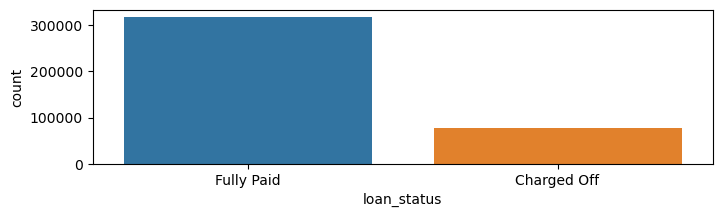

In [18]:
# Proportion of Fully paid/Charged off loans
plt.figure(figsize=(8,2))
sns.countplot(data=lc_loan, x='loan_status')

<Axes: xlabel='loan_amnt', ylabel='Count'>

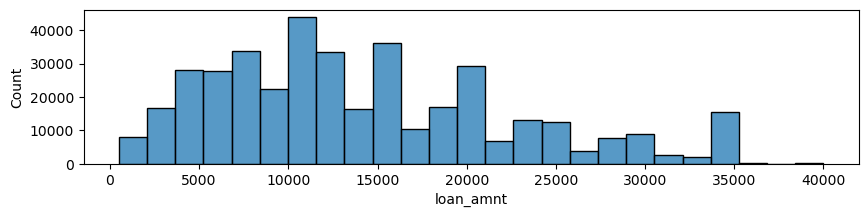

In [20]:
# Distribution of the amount borrowed for historic loans
plt.figure(figsize=(10,2))
sns.histplot(lc_loan['loan_amnt'], kde=False, bins=25)

<Axes: xlabel='int_rate', ylabel='Count'>

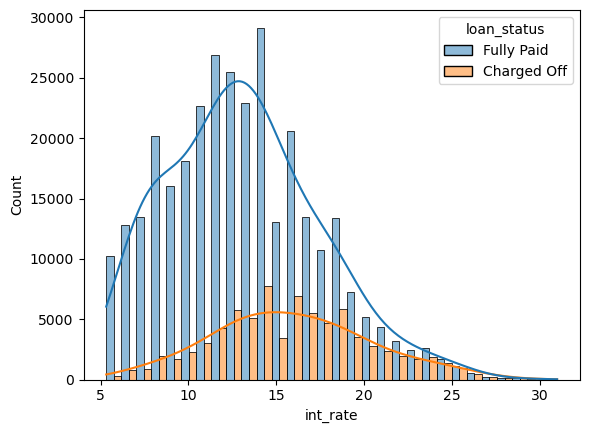

In [32]:
# Distribution with respect to the interest rate and clusterized by payment status
sns.histplot(lc_loan, x='int_rate',hue='loan_status', multiple='dodge', bins=30, kde=True, kde_kws={'bw_adjust':4})

This graph shows better payment rate for bigger interest rate, although the difference is not significant

C:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


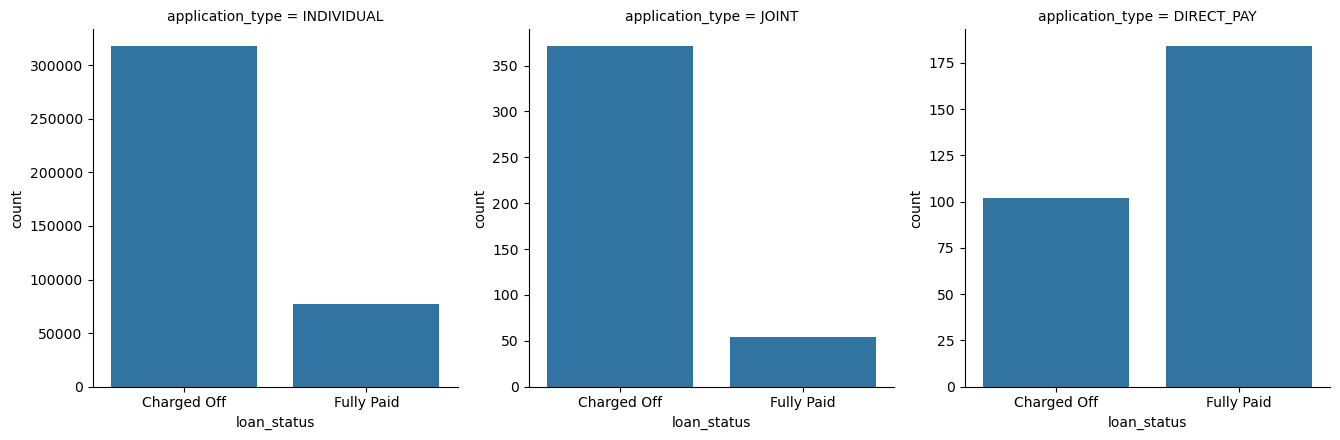

In [14]:
#Proportion of Fully paid/Charged off loans for each kind of application type
g = sns.FacetGrid(lc_loan,col='application_type', sharey=False, height=4.5)
#If we let share y, the 2nd and 3rd graphs would be tiny compared to the 1st
g.map(sns.countplot,'loan_status')

This shows that the direct payment type is the most risky and the joint type is the least

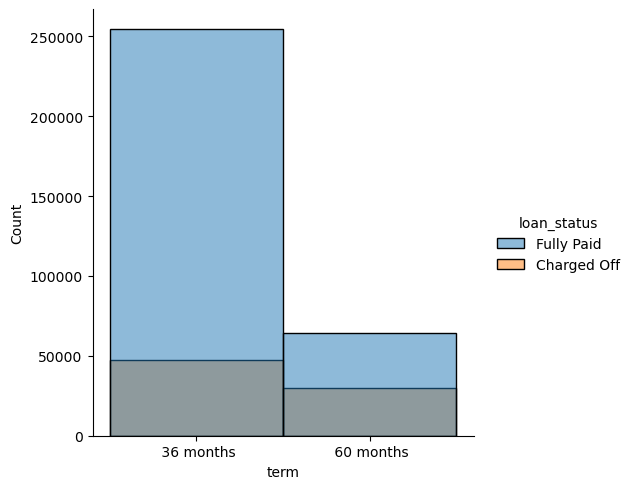

In [36]:
# Dependency of loan_status with the duration of the loan (term column)
sns.displot(lc_loan, x='term', hue='loan_status')

We can see that the proportion Fully paid vs. Charged off is much greater in loans with a 36 months duration

<Axes: xlabel='loan_status', ylabel='loan_amnt'>

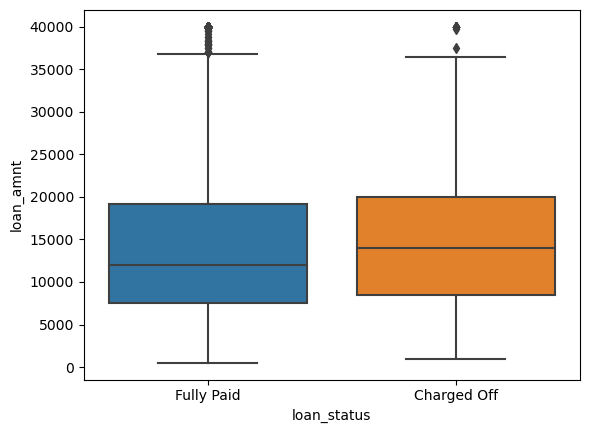

In [16]:
sns.boxplot(data=lc_loan, x='loan_status',y='loan_amnt')

<Axes: xlabel='sub_grade', ylabel='count'>

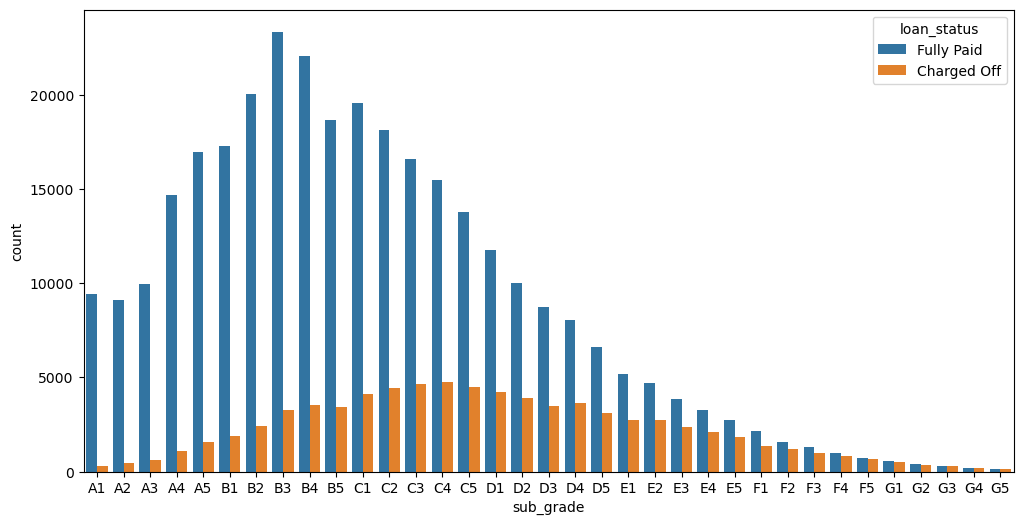

In [17]:
plt.figure(figsize=(12,6))
sns.countplot(data=lc_loan, x='sub_grade', hue='loan_status', order=sorted(lc_loan['sub_grade'].unique()))

Statistical information is only shown for numerical categories, but I expected that the employment, based on emp_length description, length was also of this kind, let's have a look:

In [18]:
lc_loan['emp_length']

0         10+ years
1           4 years
2          < 1 year
3           6 years
4           9 years
            ...    
396025      2 years
396026      5 years
396027    10+ years
396028    10+ years
396029    10+ years
Name: emp_length, Length: 396030, dtype: object

In [19]:
lc_loan['emp_length'].unique() #There are NaN values

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year',
       nan], dtype=object)

It could be useful to have that category as a numerical feature:

In [20]:
def str_to_num(str):
    '''
    Description:
    '''
    if type(str)==float:
        return str
    elif str.split()[0]=='<':
        return 0
    else:
        return int(re.findall(r'-?\d+\.?\d*', str)[0])

In [21]:
lc_loan['emp_length_num'] = lc_loan['emp_length'].apply(str_to_num)
lc_loan['emp_length_num'].unique()

array([10.,  4.,  0.,  6.,  9.,  2.,  3.,  8.,  7.,  5.,  1., nan])

In [22]:
lc_loan.drop('emp_length', axis=1, inplace=True)

We can now drop the original emp_length column and do the same process with the "term" column

In [23]:
lc_loan['term_num'] = lc_loan['term'].apply(str_to_num)
lc_loan.drop('term', axis=1, inplace=True)
lc_loan['term_num'].unique()

array([36, 60], dtype=int64)

And we can also turn the subgrade column to numerical following the next pattern:
<br>A1 -> 1.00   B1 -> 2.00   ...   G1 -> 7.00
<br>A2 -> 1.20   B2 -> 2.20   ...   G2 -> 7.20
<br>A3 -> 1.40   B3 -> 2.40   ...   G3 -> 7.40
<br>A4 -> 1.60   B4 -> 2.60   ...   G4 -> 7.60
<br>A5 -> 1.80   B5 -> 2.80   ...   G5 -> 7.80

In [24]:
lc_loan['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [25]:
lc_loan['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

In [26]:
def alfnum_to_num(grad):
    '''
    Description:
    '''
    grad_n=[]
    
    #First, we check the letter
    sep = [char for char in grad]
    if sep[0]=='A':
        grad_n.append(1)
    elif sep[0]=='B':
        grad_n.append(2)
    elif sep[0]=='C':
        grad_n.append(3)
    elif sep[0]=='D':
        grad_n.append(4)
    elif sep[0]=='E':
        grad_n.append(5)
    elif sep[0]=='F':
        grad_n.append(6)
    elif sep[0]=='G':
        grad_n.append(7)
        
    #Now let's check subgrades:
    if sep[1]=='1':
        grad_n.append(0.00)
    elif sep[1]=='2':
        grad_n.append(0.20)
    elif sep[1]=='3':
        grad_n.append(0.40)
    elif sep[1]=='4':
        grad_n.append(0.60)
    elif sep[1]=='5':
        grad_n.append(0.80)
        
    return sum(grad_n)

In [27]:
lc_loan['grade_num'] = lc_loan['sub_grade'].apply(alfnum_to_num)
lc_loan.grade_num.isnull().sum() # No null values

0

In [28]:
lc_loan.head()

,loan_amnt,int_rate,installment,grade,sub_grade,emp_title,home_ownership,annual_inc,verification_status,issue_d,...,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,emp_length_num,term_num,grade_num
0,10000.0,11.44,329.48,B,B4,Marketing,RENT,117000.0,Not Verified,Jan-2015,...,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",10.0,36,2.6
1,8000.0,11.99,265.68,B,B5,Credit analyst,MORTGAGE,65000.0,Not Verified,Jan-2015,...,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",4.0,36,2.8
2,15600.0,10.49,506.97,B,B3,Statistician,RENT,43057.0,Source Verified,Jan-2015,...,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",0.0,36,2.4
3,7200.0,6.49,220.65,A,A2,Client Advocate,RENT,54000.0,Not Verified,Nov-2014,...,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",6.0,36,1.2
4,24375.0,17.27,609.33,C,C5,Destiny Management Inc.,MORTGAGE,55000.0,Verified,Apr-2013,...,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",9.0,60,3.8


In [29]:
# Drop the original columns
lc_loan.drop(['grade', 'sub_grade'], axis=1, inplace=True)

### Create dummy variables for categorical features

In [30]:
lc_loan['application_type'].unique()

array(['INDIVIDUAL', 'JOINT', 'DIRECT_PAY'], dtype=object)

In [31]:
dumms1 = pd.get_dummies(data=lc_loan, prefix='dum', columns=['application_type'], drop_first=True)
dumms1.head()

,loan_amnt,int_rate,installment,emp_title,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,...,total_acc,initial_list_status,mort_acc,pub_rec_bankruptcies,address,emp_length_num,term_num,grade_num,dum_INDIVIDUAL,dum_JOINT
0,10000.0,11.44,329.48,Marketing,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,...,25.0,w,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",10.0,36,2.6,1,0
1,8000.0,11.99,265.68,Credit analyst,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,...,27.0,f,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",4.0,36,2.8,1,0
2,15600.0,10.49,506.97,Statistician,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,...,26.0,f,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",0.0,36,2.4,1,0
3,7200.0,6.49,220.65,Client Advocate,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,...,13.0,f,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",6.0,36,1.2,1,0
4,24375.0,17.27,609.33,Destiny Management Inc.,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,...,43.0,f,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",9.0,60,3.8,1,0


In [32]:
lc_loan = lc_loan.merge(dumms1)

lc_loan.rename(
    columns={"application_type_INDIVIDUAL": "Individual", "application_type_JOINT": "Joint"},
    inplace=True,
)

In [33]:
# Remove the original application_type column
lc_loan.drop('application_type', axis=1, inplace=True)

### Let's check emp_title, title and purpose columns

In [34]:
lc_loan['emp_title'].nunique()

173105

In [35]:
lc_loan['emp_title'].value_counts()[:30]

Teacher                     4389
Manager                     4250
Registered Nurse            1856
RN                          1846
Supervisor                  1830
Sales                       1638
Project Manager             1505
Owner                       1410
Driver                      1339
Office Manager              1218
manager                     1145
Director                    1089
General Manager             1074
Engineer                     995
teacher                      962
driver                       882
Vice President               857
Operations Manager           763
Administrative Assistant     756
Accountant                   748
President                    742
owner                        697
Account Manager              692
Police Officer               686
supervisor                   673
Attorney                     667
Sales Manager                665
sales                        645
Executive Assistant          642
Analyst                      623
Name: emp_

Too many different jobs, we drop emp_title

In [36]:
lc_loan.drop('emp_title', axis=1, inplace=True)

In [37]:
lc_loan['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

In [38]:
lc_loan['purpose'].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

Title and purpose show about the same information. We can drop title

In [39]:
lc_loan.drop('title', axis=1, inplace=True)

In [40]:
lc_loan['purpose'].nunique()

14

Let's make it a dummy variable

In [41]:
dumms2 = pd.get_dummies(data=lc_loan, prefix='dum', columns=['purpose'], drop_first=True)

In [42]:
lc_loan = lc_loan.merge(dumms2)

In [43]:
lc_loan.drop('purpose', axis=1, inplace=True)

In [44]:
lc_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 396030 entries, 0 to 396029
Data columns (total 37 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   loan_amnt               396030 non-null  float64
 1   int_rate                396030 non-null  float64
 2   installment             396030 non-null  float64
 3   home_ownership          396030 non-null  object 
 4   annual_inc              396030 non-null  float64
 5   verification_status     396030 non-null  object 
 6   issue_d                 396030 non-null  object 
 7   loan_status             396030 non-null  object 
 8   dti                     396030 non-null  float64
 9   earliest_cr_line        396030 non-null  object 
 10  open_acc                396030 non-null  float64
 11  pub_rec                 396030 non-null  float64
 12  revol_bal               396030 non-null  float64
 13  revol_util              395754 non-null  float64
 14  total_acc           

In [45]:
lc_loan['home_ownership'].value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: home_ownership, dtype: int64

Let's join Other, None and Any into 1 category called Other

In [46]:
lc_loan['home_own'] = lc_loan['home_ownership']

In [47]:
lc_loan.head(30)

,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,loan_status,dti,earliest_cr_line,...,dum_house,dum_major_purchase,dum_medical,dum_moving,dum_other,dum_renewable_energy,dum_small_business,dum_vacation,dum_wedding,home_own
0,10000.0,11.44,329.48,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,26.24,Jun-1990,...,0,0,0,0,0,0,0,1,0,RENT
1,8000.0,11.99,265.68,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,22.05,Jul-2004,...,0,0,0,0,0,0,0,0,0,MORTGAGE
2,15600.0,10.49,506.97,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,12.79,Aug-2007,...,0,0,0,0,0,0,0,0,0,RENT
3,7200.0,6.49,220.65,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,2.60,Sep-2006,...,0,0,0,0,0,0,0,0,0,RENT
4,24375.0,17.27,609.33,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,33.95,Mar-1999,...,0,0,0,0,0,0,0,0,0,MORTGAGE
5,20000.0,13.33,677.07,MORTGAGE,86788.0,Verified,Sep-2015,Fully Paid,16.31,Jan-2005,...,0,0,0,0,0,0,0,0,0,MORTGAGE
6,18000.0,5.32,542.07,MORTGAGE,125000.0,Source Verified,Sep-2015,Fully Paid,1.36,Aug-2005,...,0,0,0,0,0,0,0,0,0,MORTGAGE
7,13000.0,11.14,426.47,RENT,46000.0,Not Verified,Sep-2012,Fully Paid,26.87,Sep-1994,...,0,0,0,0,0,0,0,0,0,RENT
8,18900.0,10.99,410.84,RENT,103000.0,Verified,Oct-2014,Fully Paid,12.52,Jun-1994,...,0,0,0,0,0,0,0,0,0,RENT
9,26300.0,16.29,928.40,MORTGAGE,115000.0,Verified,Apr-2012,Fully Paid,23.69,Dec-1997,...,0,0,0,0,0,0,0,0,0,MORTGAGE


In [48]:
lc_loan['home_own'] = lc_loan['home_ownership'].apply(lambda x: 'OTHER' if x in ['NONE', 'ANY'] else x)

In [49]:
lc_loan['home_own'].value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          146
Name: home_own, dtype: int64

In [50]:
dumms3 = pd.get_dummies(data=lc_loan, prefix='dum', columns=['home_own'], drop_first=True)
lc_loan = lc_loan.merge(dumms3)                                             # Join dummy columns
lc_loan.drop(['home_ownership', 'home_own'], axis=1, inplace=True)          #Drop original columns

In [51]:
lc_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 396030 entries, 0 to 396029
Data columns (total 39 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   loan_amnt               396030 non-null  float64
 1   int_rate                396030 non-null  float64
 2   installment             396030 non-null  float64
 3   annual_inc              396030 non-null  float64
 4   verification_status     396030 non-null  object 
 5   issue_d                 396030 non-null  object 
 6   loan_status             396030 non-null  object 
 7   dti                     396030 non-null  float64
 8   earliest_cr_line        396030 non-null  object 
 9   open_acc                396030 non-null  float64
 10  pub_rec                 396030 non-null  float64
 11  revol_bal               396030 non-null  float64
 12  revol_util              395754 non-null  float64
 13  total_acc               396030 non-null  float64
 14  initial_list_status 

In [52]:
# Let's check verification_status
lc_loan['verification_status'].value_counts()

Verified           139563
Source Verified    131385
Not Verified       125082
Name: verification_status, dtype: int64

In [53]:
# Make it a dummy
dumms4 = pd.get_dummies(data=lc_loan, prefix='dum', columns=['verification_status'], drop_first=True)
lc_loan = lc_loan.merge(dumms4)                                             # Join dummy columns
lc_loan.drop(['verification_status'], axis=1, inplace=True)                 # Drop original column

# Issue_d: will numerical data be treated linearly?

Let's recall what issue_d means

In [54]:
lc_info.columns

Index(['LoanStatNew', 'Description'], dtype='object')

In [55]:
lc_info[lc_info['LoanStatNew'] == 'issue_d'].Description

11    The month which the loan was funded
Name: Description, dtype: object

In [56]:
lc_loan['issue_d']

0         Jan-2015
1         Jan-2015
2         Jan-2015
3         Nov-2014
4         Apr-2013
            ...   
396025    Oct-2015
396026    Feb-2015
396027    Oct-2013
396028    Aug-2012
396029    Jun-2010
Name: issue_d, Length: 396030, dtype: object

We can break down issue_d to Year and Month

In [57]:
# Save the loan year
lc_loan['loan_year'] = lc_loan['issue_d'].apply(lambda x: x[-4:]).astype(np.uint16)

In [58]:
lc_loan['loan_year'].value_counts()

2014    102860
2013     97662
2015     94264
2012     41202
2016     28088
2011     17435
2010      9258
2009      3826
2008      1240
2007       195
Name: loan_year, dtype: int64

In [59]:
# Save the loan month
lc_loan['loan_month'] = lc_loan['issue_d'].apply(lambda x: x[-8:-5])

In [60]:
lc_loan['loan_month'].value_counts()

Oct    42130
Jul    39714
Jan    34682
Nov    34068
Apr    33223
Aug    32816
Mar    31919
May    31895
Jun    30140
Dec    29082
Feb    28742
Sep    27619
Name: loan_month, dtype: int64

We have the 12 months of a Year and 10 diferent years. We can treat the **month variable categorically** as the month in which future loans will be requested will fall into one of the existing categories (the 12 months), but regarding the years, new loans will occur in future years and the values of the past won't be repeated (maybe the last year will if it's not over yet). Because of that I will try **years linearly**

# Turn month into dummy
dumms5 = pd.get_dummies(data=lc_loan, prefix='dumy', columns=['loan_month'], drop_first=True)
lc_loan = lc_loan.merge(dumms5)                           # Join dummy columns
lc_loan.drop(['loan_month','issue_d'], axis=1, inplace=True)        # Drop original column

In [61]:
# Turn month into dummy
pd.get_dummies(data=lc_loan, prefix='dumy', columns=['loan_month'], drop_first=True)
lc_loan.drop(['loan_month','issue_d'], axis=1, inplace=True)        # Drop original column

In [62]:
lc_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 396030 entries, 0 to 396029
Data columns (total 40 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   loan_amnt               396030 non-null  float64
 1   int_rate                396030 non-null  float64
 2   installment             396030 non-null  float64
 3   annual_inc              396030 non-null  float64
 4   loan_status             396030 non-null  object 
 5   dti                     396030 non-null  float64
 6   earliest_cr_line        396030 non-null  object 
 7   open_acc                396030 non-null  float64
 8   pub_rec                 396030 non-null  float64
 9   revol_bal               396030 non-null  float64
 10  revol_util              395754 non-null  float64
 11  total_acc               396030 non-null  float64
 12  initial_list_status     396030 non-null  object 
 13  mort_acc                358235 non-null  float64
 14  pub_rec_bankruptcies

In [63]:
lc_loan['earliest_cr_line']

0         Jun-1990
1         Jul-2004
2         Aug-2007
3         Sep-2006
4         Mar-1999
            ...   
396025    Nov-2004
396026    Feb-2006
396027    Mar-1997
396028    Nov-1990
396029    Sep-1998
Name: earliest_cr_line, Length: 396030, dtype: object

In [64]:
lc_info[lc_info['LoanStatNew'] == 'earliest_cr_line']

,LoanStatNew,Description
18,earliest_cr_line,The month the borrower's earliest reported credit line was opened


In [65]:
lc_info[lc_info['LoanStatNew'] == 'earliest_cr_line'].Description

18    The month the borrower's earliest reported credit line was opened
Name: Description, dtype: object

Let's do the same we did with issue_d

In [66]:
# Save the first credit line year
lc_loan['earliest_cr_year'] = lc_loan['earliest_cr_line'].apply(lambda x: x[-4:]).astype(np.uint16)

# Save the first credit line month
lc_loan['earliest_cr_month'] = lc_loan['earliest_cr_line'].apply(lambda x: x[-8:-5])

# Turn month into dummy
dumms6 = pd.get_dummies(data=lc_loan, prefix='dum', columns=['earliest_cr_month'], drop_first=True)
lc_loan = lc_loan.merge(dumms6)                                                       # Join dummy columns
lc_loan.drop(['earliest_cr_month','earliest_cr_line'], axis=1, inplace=True)        # Drop original column

In [67]:
lc_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 396030 entries, 0 to 396029
Data columns (total 51 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   loan_amnt               396030 non-null  float64
 1   int_rate                396030 non-null  float64
 2   installment             396030 non-null  float64
 3   annual_inc              396030 non-null  float64
 4   loan_status             396030 non-null  object 
 5   dti                     396030 non-null  float64
 6   open_acc                396030 non-null  float64
 7   pub_rec                 396030 non-null  float64
 8   revol_bal               396030 non-null  float64
 9   revol_util              395754 non-null  float64
 10  total_acc               396030 non-null  float64
 11  initial_list_status     396030 non-null  object 
 12  mort_acc                358235 non-null  float64
 13  pub_rec_bankruptcies    395495 non-null  float64
 14  address             

# Initial list status ????

In [68]:
lc_info[lc_info['LoanStatNew'] == 'initial_list_status'].Description

24    The initial listing status of the loan. Possible values are – W, F
Name: Description, dtype: object

In [69]:
# Turn month into dummy
dumms7 = pd.get_dummies(data=lc_loan, prefix='dum', columns=['initial_list_status'], drop_first=True)
lc_loan = lc_loan.merge(dumms7)                                                     # Join dummy columns
lc_loan.drop(['initial_list_status'], axis=1, inplace=True)                         # Drop original column

# Address

In [70]:
lc_loan['zip'] = lc_loan['address'].apply(lambda x: x[-5:])

In [71]:
lc_loan['address'].apply(lambda x: x[-8:])

0         OK 22690
1         SD 05113
2         WV 05113
3         MA 00813
4         VA 11650
            ...   
396025    DC 30723
396026    LA 05113
396027    NY 70466
396028    FL 29597
396029    AR 48052
Name: address, Length: 396030, dtype: object

In [72]:
lc_loan['address'].apply(lambda x: x[-8:]).nunique()

540

In [73]:
lc_loan['zip'].nunique()

10

Let's check how many States there are in the data

In [74]:
lc_loan['address'].apply(lambda x: x[-8:-6])

0         OK
1         SD
2         WV
3         MA
4         VA
          ..
396025    DC
396026    LA
396027    NY
396028    FL
396029    AR
Name: address, Length: 396030, dtype: object

In [75]:
lc_loan['address'].apply(lambda x: x[-8:-6]).nunique()

54

## I will just use the zipcode for now because there are too many states

In [76]:
lc_loan = pd.get_dummies(data=lc_loan, prefix='zip', columns=['zip'], drop_first=True)
lc_loan.drop('address', axis=1, inplace=True)
lc_loan.head()

,loan_amnt,int_rate,installment,annual_inc,loan_status,dti,open_acc,pub_rec,revol_bal,revol_util,...,dum_w,zip_05113,zip_11650,zip_22690,zip_29597,zip_30723,zip_48052,zip_70466,zip_86630,zip_93700
0,10000.0,11.44,329.48,117000.0,Fully Paid,26.24,16.0,0.0,36369.0,41.8,...,1,0,0,1,0,0,0,0,0,0
1,8000.0,11.99,265.68,65000.0,Fully Paid,22.05,17.0,0.0,20131.0,53.3,...,0,1,0,0,0,0,0,0,0,0
2,15600.0,10.49,506.97,43057.0,Fully Paid,12.79,13.0,0.0,11987.0,92.2,...,0,1,0,0,0,0,0,0,0,0
3,7200.0,6.49,220.65,54000.0,Fully Paid,2.60,6.0,0.0,5472.0,21.5,...,0,0,0,0,0,0,0,0,0,0
4,24375.0,17.27,609.33,55000.0,Charged Off,33.95,13.0,0.0,24584.0,69.8,...,0,0,1,0,0,0,0,0,0,0


In [77]:
lc_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 396030 entries, 0 to 396029
Data columns (total 59 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   loan_amnt               396030 non-null  float64
 1   int_rate                396030 non-null  float64
 2   installment             396030 non-null  float64
 3   annual_inc              396030 non-null  float64
 4   loan_status             396030 non-null  object 
 5   dti                     396030 non-null  float64
 6   open_acc                396030 non-null  float64
 7   pub_rec                 396030 non-null  float64
 8   revol_bal               396030 non-null  float64
 9   revol_util              395754 non-null  float64
 10  total_acc               396030 non-null  float64
 11  mort_acc                358235 non-null  float64
 12  pub_rec_bankruptcies    395495 non-null  float64
 13  emp_length_num          377729 non-null  float64
 14  term_num            

## Let's turn "loan_status" (target feature) to a dummy variable:

In [78]:
lc_loan['loan_status'].value_counts()

Fully Paid     318357
Charged Off     77673
Name: loan_status, dtype: int64

In [79]:
lc_loan['status_dummy'] = (lc_loan['loan_status'].map({'Fully Paid':1,'Charged Off':0})).astype(np.uint8)
lc_loan[['loan_status','status_dummy']].tail(25)

,loan_status,status_dummy
396005,Fully Paid,1
396006,Fully Paid,1
396007,Fully Paid,1
396008,Fully Paid,1
396009,Fully Paid,1
396010,Fully Paid,1
396011,Charged Off,0
396012,Fully Paid,1
396013,Charged Off,0
396014,Fully Paid,1


Let's see how every category correlates to each other and specially to status_dummy:

In [80]:
lc_loan['status_dummy']

0         1
1         1
2         1
3         1
4         0
         ..
396025    1
396026    1
396027    1
396028    1
396029    1
Name: status_dummy, Length: 396030, dtype: uint8

In [81]:
lc_loan.corr()

C:\Users\lol_s\AppData\Local\Temp\ipykernel_14656\922826026.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  lc_loan.corr()


,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,...,zip_05113,zip_11650,zip_22690,zip_29597,zip_30723,zip_48052,zip_70466,zip_86630,zip_93700,status_dummy
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,...,-0.011620,0.019653,-0.000658,-0.010556,-0.000254,0.000953,0.001021,0.019599,0.021638,-0.059836
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,...,-0.045131,0.086701,-0.001254,-0.042415,0.000633,0.000585,0.001037,0.085311,0.083259,-0.247758
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,...,-0.008217,0.013924,-0.000797,-0.007988,0.000112,0.000805,0.000032,0.012558,0.016232,-0.041082
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,...,0.009451,-0.017641,-0.002111,0.008213,0.001275,-0.000320,-0.000477,-0.019129,-0.015702,0.053432
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,...,-0.010433,0.019401,-0.001037,-0.011449,0.003838,-0.000965,-0.000852,0.020687,0.020997,-0.062413
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,...,-0.007082,0.010054,-0.000223,-0.004009,0.003090,0.000686,-0.002147,0.009621,0.009693,-0.028012
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,...,-0.002677,0.006612,0.001556,-0.002844,0.001211,-0.002103,-0.000993,0.004848,0.008140,-0.019933
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,...,0.000301,-0.004028,0.000117,0.003584,-0.000702,0.001480,-0.002238,-0.001981,-0.003070,0.010892
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,...,-0.013404,0.027707,0.000780,-0.013049,-0.001590,0.000023,-0.000370,0.026856,0.027864,-0.082373
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,...,0.002261,-0.006916,0.000850,0.003098,0.000466,-0.000835,-0.000309,-0.004835,-0.005179,0.017893


In [82]:
lc_loan.corr()['status_dummy'].abs().sort_values()

C:\Users\lol_s\AppData\Local\Temp\ipykernel_14656\3653744060.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  lc_loan.corr()['status_dummy'].abs().sort_values()


dum_Jan                   0.000166
dum_house                 0.000198
dum_Feb                   0.000443
dum_Nov                   0.000464
zip_70466                 0.000515
dum_Aug                   0.001018
zip_30723                 0.001260
dum_vacation              0.001371
dum_Sep                   0.001404
dum_Jul                   0.001502
dum_Jun                   0.001507
dum_OTHER                 0.001867
dum_May                   0.002026
dum_educational           0.002099
zip_22690                 0.002410
dum_INDIVIDUAL            0.002486
dum_Dec                   0.002735
dum_renewable_energy      0.002753
dum_Oct                   0.003270
dum_Mar                   0.003284
zip_48052                 0.004110
dum_medical               0.005468
dum_JOINT                 0.005702
dum_moving                0.008289
dum_OWN                   0.008726
pub_rec_bankruptcies      0.009383
dum_w                     0.009489
dum_other                 0.009609
revol_bal           

We need to take only numerical data, so let's drop the rest of the columns

## Missing Data

Let's see what are the descriptions for the columns containing Nans

In [5]:
lc_loan.isnull().sum()[lc_loan.isnull().sum() != 0] #num of nulls for each column that contains them

emp_title               22927
emp_length              18301
title                    1755
revol_util                276
mort_acc                37795
pub_rec_bankruptcies      535
dtype: int64

In [6]:
pd.options.display.max_colwidth = 150 # This sets the amount length of string to be shown to 150 chars
lc_info.iloc[[6,7,14,22,26,27]]

,LoanStatNew,Description
6,emp_title,The job title supplied by the Borrower when applying for the loan.*
7,emp_length,Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
14,title,The loan title provided by the borrower
22,revol_util,"Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit."
26,mort_acc,Number of mortgage accounts.
27,pub_rec_bankruptcies,Number of public record bankruptcies


In [7]:
lc_loan[['emp_title','emp_length','title','revol_util','mort_acc','pub_rec_bankruptcies']].describe()

,revol_util,mort_acc,pub_rec_bankruptcies
count,395754.000000,358235.000000,395495.000000
mean,53.791749,1.813991,0.121648
std,24.452193,2.147930,0.356174
min,0.000000,0.000000,0.000000
25%,35.800000,0.000000,0.000000
50%,54.800000,1.000000,0.000000
75%,72.900000,3.000000,0.000000
max,892.300000,34.000000,8.000000


In [83]:
lc_loan.isna().sum().sort_values()

loan_amnt                     0
dum_OWN                       0
dum_RENT                      0
dum_Source Verified           0
dum_Verified                  0
loan_year                     0
earliest_cr_year              0
dum_Aug                       0
dum_Dec                       0
dum_Feb                       0
dum_Jan                       0
dum_Jul                       0
dum_Jun                       0
dum_OTHER                     0
dum_Mar                       0
dum_Nov                       0
dum_Oct                       0
dum_Sep                       0
dum_w                         0
zip_05113                     0
zip_11650                     0
zip_22690                     0
zip_29597                     0
zip_30723                     0
zip_48052                     0
zip_70466                     0
zip_86630                     0
dum_May                       0
dum_wedding                   0
dum_vacation                  0
dum_small_business            0
int_rate

In [84]:
lc_loan.isna().sum().sort_values()/len(lc_loan)*100

loan_amnt                 0.000000
dum_OWN                   0.000000
dum_RENT                  0.000000
dum_Source Verified       0.000000
dum_Verified              0.000000
loan_year                 0.000000
earliest_cr_year          0.000000
dum_Aug                   0.000000
dum_Dec                   0.000000
dum_Feb                   0.000000
dum_Jan                   0.000000
dum_Jul                   0.000000
dum_Jun                   0.000000
dum_OTHER                 0.000000
dum_Mar                   0.000000
dum_Nov                   0.000000
dum_Oct                   0.000000
dum_Sep                   0.000000
dum_w                     0.000000
zip_05113                 0.000000
zip_11650                 0.000000
zip_22690                 0.000000
zip_29597                 0.000000
zip_30723                 0.000000
zip_48052                 0.000000
zip_70466                 0.000000
zip_86630                 0.000000
dum_May                   0.000000
dum_wedding         

As the number of NaNs in "revol_util" and "pub_rec_bankruptcies" is relatively low, we can just drop the rows that contain those NaNs

In [85]:
lc_loan.drop(lc_loan[lc_loan['revol_util'].isna()].index, inplace=True)
lc_loan.drop(lc_loan[lc_loan['pub_rec_bankruptcies'].isna()].index, inplace=True)
lc_loan.isna().sum().sort_values()/len(lc_loan)*100

loan_amnt                 0.000000
dum_OWN                   0.000000
dum_RENT                  0.000000
dum_Source Verified       0.000000
dum_Verified              0.000000
loan_year                 0.000000
earliest_cr_year          0.000000
dum_Aug                   0.000000
dum_Dec                   0.000000
dum_Feb                   0.000000
dum_Jan                   0.000000
dum_Jul                   0.000000
dum_Jun                   0.000000
dum_OTHER                 0.000000
dum_Mar                   0.000000
dum_Nov                   0.000000
dum_Oct                   0.000000
dum_Sep                   0.000000
dum_w                     0.000000
zip_05113                 0.000000
zip_11650                 0.000000
zip_22690                 0.000000
zip_29597                 0.000000
zip_30723                 0.000000
zip_48052                 0.000000
zip_70466                 0.000000
zip_86630                 0.000000
dum_May                   0.000000
dum_wedding         

Let's try to fill missing data in the other two columns

# Scaling the data

In [86]:
# Create a dataframe without the dummy columns to scale just those variables
lc_loan.drop(('loan_status'), axis=1, inplace=True)
lc_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 59 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   loan_amnt               395219 non-null  float64
 1   int_rate                395219 non-null  float64
 2   installment             395219 non-null  float64
 3   annual_inc              395219 non-null  float64
 4   dti                     395219 non-null  float64
 5   open_acc                395219 non-null  float64
 6   pub_rec                 395219 non-null  float64
 7   revol_bal               395219 non-null  float64
 8   revol_util              395219 non-null  float64
 9   total_acc               395219 non-null  float64
 10  mort_acc                358014 non-null  float64
 11  pub_rec_bankruptcies    395219 non-null  float64
 12  emp_length_num          376929 non-null  float64
 13  term_num                395219 non-null  int64  
 14  grade_num           

In [87]:
# We drop dummies

# use numpy r_ to concatenate slices
dumms = lc_loan.iloc[:,np.r_[15:35, 37:59]] # We'll re-add this later
noDum = lc_loan.iloc[:,np.r_[:15, 35, 36]]

In [88]:
noDum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             395219 non-null  float64
 1   int_rate              395219 non-null  float64
 2   installment           395219 non-null  float64
 3   annual_inc            395219 non-null  float64
 4   dti                   395219 non-null  float64
 5   open_acc              395219 non-null  float64
 6   pub_rec               395219 non-null  float64
 7   revol_bal             395219 non-null  float64
 8   revol_util            395219 non-null  float64
 9   total_acc             395219 non-null  float64
 10  mort_acc              358014 non-null  float64
 11  pub_rec_bankruptcies  395219 non-null  float64
 12  emp_length_num        376929 non-null  float64
 13  term_num              395219 non-null  int64  
 14  grade_num             395219 non-null  float64
 15  

In [89]:
dumms.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 42 columns):
 #   Column                  Non-Null Count   Dtype
---  ------                  --------------   -----
 0   dum_INDIVIDUAL          395219 non-null  uint8
 1   dum_JOINT               395219 non-null  uint8
 2   dum_credit_card         395219 non-null  uint8
 3   dum_debt_consolidation  395219 non-null  uint8
 4   dum_educational         395219 non-null  uint8
 5   dum_home_improvement    395219 non-null  uint8
 6   dum_house               395219 non-null  uint8
 7   dum_major_purchase      395219 non-null  uint8
 8   dum_medical             395219 non-null  uint8
 9   dum_moving              395219 non-null  uint8
 10  dum_other               395219 non-null  uint8
 11  dum_renewable_energy    395219 non-null  uint8
 12  dum_small_business      395219 non-null  uint8
 13  dum_vacation            395219 non-null  uint8
 14  dum_wedding             395219 non-null  uint8
 15  

In [90]:
# We should scale the data as KNN is a distance based algorithm and reduces biases
from sklearn.preprocessing import MinMaxScaler

# Instanciate the scaler model and scale the data
scaler = MinMaxScaler()
scaled_noDum = pd.DataFrame(scaler.fit_transform(noDum), columns = noDum.columns)

In [91]:
scaled_noDum.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,emp_length_num,term_num,grade_num,loan_year,earliest_cr_year
count,395219.000000,395219.000000,395219.000000,395219.000000,395219.000000,395219.000000,395219.000000,395219.000000,395219.000000,395219.000000,358014.000000,395219.000000,376929.000000,395219.000000,395219.000000,395219.000000,395219.000000
mean,0.344862,0.324195,0.274086,0.008522,0.001739,0.115938,0.002075,0.009093,0.060303,0.157225,0.053347,0.015215,0.594187,0.237772,0.325956,0.737501,0.780603
std,0.211571,0.174248,0.165181,0.007070,0.001803,0.057696,0.006176,0.011808,0.027390,0.079767,0.063173,0.044534,0.364464,0.425719,0.194124,0.162861,0.104334
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.189873,0.201402,0.154342,0.005169,0.001130,0.078652,0.000000,0.003464,0.040233,0.100671,0.000000,0.000000,0.300000,0.000000,0.176471,0.666667,0.724638
50%,0.291139,0.312037,0.236808,0.007351,0.001692,0.101124,0.000000,0.006419,0.061414,0.147651,0.029412,0.000000,0.600000,0.000000,0.294118,0.777778,0.797101
75%,0.493671,0.437476,0.363510,0.010337,0.002299,0.146067,0.000000,0.011258,0.081699,0.201342,0.088235,0.000000,1.000000,0.000000,0.441176,0.888889,0.855072
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


It looks good. 

In [92]:
# Now we add the dummy columns
scaled_df = scaled_noDum.join(dumms, on=dumms.index)
scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395219 entries, 0 to 395218
Data columns (total 59 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   loan_amnt               395219 non-null  float64
 1   int_rate                395219 non-null  float64
 2   installment             395219 non-null  float64
 3   annual_inc              395219 non-null  float64
 4   dti                     395219 non-null  float64
 5   open_acc                395219 non-null  float64
 6   pub_rec                 395219 non-null  float64
 7   revol_bal               395219 non-null  float64
 8   revol_util              395219 non-null  float64
 9   total_acc               395219 non-null  float64
 10  mort_acc                358014 non-null  float64
 11  pub_rec_bankruptcies    395219 non-null  float64
 12  emp_length_num          376929 non-null  float64
 13  term_num                395219 non-null  float64
 14  grade_num           

# Neural Network

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [94]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
# Preventing overfitting
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

### KNN Imputer

# MICE

from sklearn.ensemble import RandomForestClassifier


from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [108]:
from sklearn.impute import KNNImputer

In [109]:
scaled_df.shape # Width of 48 neurons, as the last one is the target

(395219, 59)

In [106]:
model = Sequential()

model.add(Dense(units=59, activation='relu')) # Input layer
model.add(Dropout(0.2))
model.add(Dense(units=30, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=15, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))# Output layer

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')

## Model training

In [98]:
#imputer = KNNImputer(n_neighbors=2)

In [99]:
#imputed_df = imputer.fit_transform(scaled_df)

In [100]:
#pd.DataFrame(imputed_df).tail(5)

In [101]:
scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395219 entries, 0 to 395218
Data columns (total 59 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   loan_amnt               395219 non-null  float64
 1   int_rate                395219 non-null  float64
 2   installment             395219 non-null  float64
 3   annual_inc              395219 non-null  float64
 4   dti                     395219 non-null  float64
 5   open_acc                395219 non-null  float64
 6   pub_rec                 395219 non-null  float64
 7   revol_bal               395219 non-null  float64
 8   revol_util              395219 non-null  float64
 9   total_acc               395219 non-null  float64
 10  mort_acc                358014 non-null  float64
 11  pub_rec_bankruptcies    395219 non-null  float64
 12  emp_length_num          376929 non-null  float64
 13  term_num                395219 non-null  float64
 14  grade_num           

In [103]:
scaled_df.corr()['status_dummy'].abs().sort_values()

dum_Jan                   0.000236
dum_house                 0.000262
dum_Nov                   0.000379
dum_Feb                   0.000408
zip_70466                 0.000529
dum_Aug                   0.001082
zip_30723                 0.001191
dum_vacation              0.001301
dum_Sep                   0.001360
dum_Jun                   0.001427
dum_Jul                   0.001431
dum_OTHER                 0.001632
dum_May                   0.001936
dum_educational           0.002109
zip_22690                 0.002432
dum_INDIVIDUAL            0.002486
dum_renewable_energy      0.002754
dum_Dec                   0.002762
dum_Mar                   0.003226
dum_Oct                   0.003279
zip_48052                 0.004072
dum_medical               0.005489
dum_JOINT                 0.005709
dum_moving                0.008261
dum_OWN                   0.008657
pub_rec_bankruptcies      0.009403
dum_w                     0.009483
dum_other                 0.009653
revol_bal           

I will start the imputation on the mort_acc column, as it is better correlated to the target feature than emp_length_num

Let's check now how many other features to take while imputing both variables

In [95]:
scaled_df.corr()['mort_acc'].abs().sort_values(ascending=False).values[1:10]

array([0.44793528, 0.38120519, 0.29131808, 0.23627651, 0.2223815 ,
       0.19847213, 0.19506288, 0.19375192, 0.10943959])

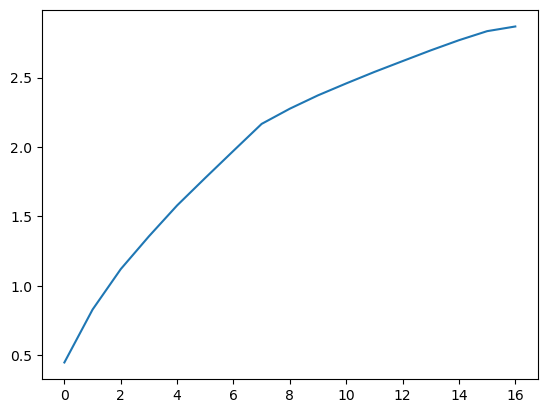

In [96]:
plt.plot(np.cumsum(scaled_df.corr()['mort_acc'].abs().sort_values(ascending=False).values[1:18]))

# <u> This curve represents the progression of the explainability of the value of mort_acc based of the sum of the values of the other variables</u>

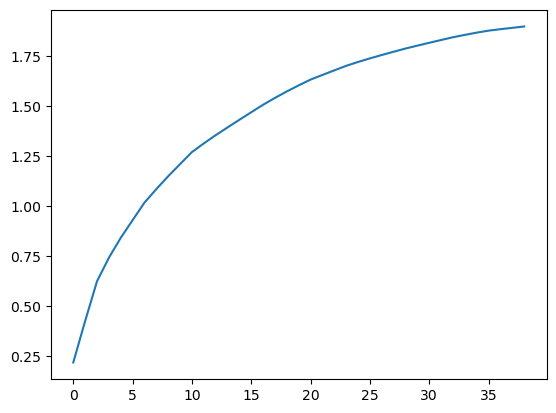

In [97]:
plt.plot(np.cumsum(scaled_df.corr()['emp_length_num'].abs().sort_values(ascending=False).values[1:40]))

We can see in the first place, that mort_acc is much better explained by the other variables and that with a number of 15 nearest neighbors that quantity is good enough

RFC = RandomForestClassifier()

imputer = IterativeImputer(estimator=RFC, verbose=1, max_iter=30, imputation_order='descending', n_nearest_features=3)
imputed_df = imputer.fit_transform(scaled_df) # Outputs an array
  
# Neural networks work with arrays
y = imputed_df[:,47]                            # status_dummy
X = imputed_df[:,:47]                           # rest of columns
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
    
model.fit(x=X_train, 
      y=y_train, 
      epochs=150,
      batch_size=256,
      validation_data=(X_test, y_test), verbose=1,
      callbacks=[early_stop]
      )
# Create global variables containing the predictions
globals()['prediction%s' % it] = (model.predict(X_test) > 0.5).astype("int32")

# Imput missing values for neighbor number ranging from 2 to 3
for it in range(2,3):
    imputer = KNNImputer(n_neighbors=it)
    imputed_df = imputer.fit_transform(scaled_df) # Outputs an array
    
    # Neural networks work with arrays
    y = imputed_df[:,47]                            # status_dummy
    X = imputed_df[:,:47]                           # rest of columns
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
    
    model.fit(x=X_train, 
          y=y_train, 
          epochs=150,
          batch_size=256,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )
    # Create global variables containing the predictions
    globals()['prediction%s' % it] = (model.predict(X_test) > 0.5).astype("int32")

# 2 Neighbors

In [98]:
from sklearn.impute import KNNImputer

In [99]:
imputer = KNNImputer(n_neighbors=2)
imputed_df = imputer.fit_transform(scaled_df) # Outputs an array

In [100]:
scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395219 entries, 0 to 395218
Data columns (total 59 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   loan_amnt               395219 non-null  float64
 1   int_rate                395219 non-null  float64
 2   installment             395219 non-null  float64
 3   annual_inc              395219 non-null  float64
 4   dti                     395219 non-null  float64
 5   open_acc                395219 non-null  float64
 6   pub_rec                 395219 non-null  float64
 7   revol_bal               395219 non-null  float64
 8   revol_util              395219 non-null  float64
 9   total_acc               395219 non-null  float64
 10  mort_acc                358014 non-null  float64
 11  pub_rec_bankruptcies    395219 non-null  float64
 12  emp_length_num          376929 non-null  float64
 13  term_num                395219 non-null  float64
 14  grade_num           

In [101]:
# Neural networks work with arrays
y = imputed_df[:,58]                           # status_dummy
X = imputed_df[:,:58]                          # rest of columns
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [107]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=150,
          batch_size=256,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/150
1158/1158 [==============================] - 3s 2ms/step - loss: 0.3199 - val_loss: 0.2656
Epoch 2/150
1158/1158 [==============================] - 2s 2ms/step - loss: 0.2671 - val_loss: 0.2618
Epoch 3/150
1158/1158 [==============================] - 2s 2ms/step - loss: 0.2635 - val_loss: 0.2620
Epoch 4/150
1158/1158 [==============================] - 2s 2ms/step - loss: 0.2618 - val_loss: 0.2610
Epoch 5/150
1158/1158 [==============================] - 2s 2ms/step - loss: 0.2610 - val_loss: 0.2606
Epoch 6/150
1158/1158 [==============================] - 2s 2ms/step - loss: 0.2602 - val_loss: 0.2606
Epoch 7/150
1158/1158 [==============================] - 2s 2ms/step - loss: 0.2596 - val_loss: 0.2606
Epoch 8/150
1158/1158 [==============================] - 2s 2ms/step - loss: 0.2593 - val_loss: 0.2602
Epoch 9/150
1158/1158 [==============================] - 2s 2ms/step - loss: 0.2589 - val_loss: 0.2603
Epoch 10/150
1158/1158 [==============================] - 2s 2ms/step - l

In [108]:
# Create global variables containing the predictions
pred2 = (model.predict(X_test) > 0.5).astype("int32")

3088/3088 [==============================] - 2s 635us/step


In [109]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

TypeError: no numeric data to plot

In [ ]:
print(classification_report(y_test.astype(int),pred2))

In [107]:
imputer = KNNImputer(n_neighbors=3)
imputed_df = imputer.fit_transform(scaled_df) # Outputs an array

# Neural networks work with arrays
y = imputed_df[:,58]                           # status_dummy
X = imputed_df[:,:58]                          # rest of columns
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

model.fit(x=X_train, 
          y=y_train, 
          epochs=150,
          batch_size=256,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/150
1158/1158 [==============================] - 4s 2ms/step - loss: 0.3094 - val_loss: 0.2638
Epoch 2/150
1158/1158 [==============================] - 3s 2ms/step - loss: 0.2664 - val_loss: 0.2622
Epoch 3/150
1158/1158 [==============================] - 3s 2ms/step - loss: 0.2633 - val_loss: 0.2612
Epoch 4/150
1158/1158 [==============================] - 3s 2ms/step - loss: 0.2617 - val_loss: 0.2610
Epoch 5/150
1158/1158 [==============================] - 3s 2ms/step - loss: 0.2605 - val_loss: 0.2608
Epoch 6/150
1158/1158 [==============================] - 3s 2ms/step - loss: 0.2598 - val_loss: 0.2607
Epoch 7/150
1158/1158 [==============================] - 3s 2ms/step - loss: 0.2592 - val_loss: 0.2603
Epoch 8/150
1158/1158 [==============================] - 3s 2ms/step - loss: 0.2590 - val_loss: 0.2608
Epoch 9/150
1158/1158 [==============================] - 3s 2ms/step - loss: 0.2588 - val_loss: 0.2602
Epoch 10/150
1158/1158 [==============================] - 3s 2ms/step - l

In [108]:
# Create global variables containing the predictions
pred3 = (model.predict(X_test) > 0.5).astype("int32")

3088/3088 [==============================] - 3s 852us/step


In [109]:
print(classification_report(y_test.astype(int),pred3))

              precision    recall  f1-score   support

           0       0.99      0.43      0.60     19458
           1       0.88      1.00      0.93     79347

    accuracy                           0.89     98805
   macro avg       0.93      0.72      0.77     98805
weighted avg       0.90      0.89      0.87     98805



In [106]:
imputer = KNNImputer(n_neighbors=4)
imputed_df = imputer.fit_transform(scaled_df) # Outputs an array

# Neural networks work with arrays
y = imputed_df[:,58]                           # status_dummy
X = imputed_df[:,:58]                          # rest of columns
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

model.fit(x=X_train, 
          y=y_train, 
          epochs=150,
          batch_size=256,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/150
1158/1158 [==============================] - 4s 3ms/step - loss: 0.3081 - val_loss: 0.2664
Epoch 2/150
1158/1158 [==============================] - 3s 2ms/step - loss: 0.2664 - val_loss: 0.2621
Epoch 3/150
1158/1158 [==============================] - 3s 2ms/step - loss: 0.2629 - val_loss: 0.2621
Epoch 4/150
1158/1158 [==============================] - 3s 2ms/step - loss: 0.2615 - val_loss: 0.2609
Epoch 5/150
1158/1158 [==============================] - 3s 2ms/step - loss: 0.2606 - val_loss: 0.2605
Epoch 6/150
1158/1158 [==============================] - 3s 2ms/step - loss: 0.2601 - val_loss: 0.2609
Epoch 7/150
1158/1158 [==============================] - 3s 2ms/step - loss: 0.2597 - val_loss: 0.2609
Epoch 8/150
1158/1158 [==============================] - 3s 2ms/step - loss: 0.2591 - val_loss: 0.2602
Epoch 9/150
1158/1158 [==============================] - 3s 2ms/step - loss: 0.2589 - val_loss: 0.2601
Epoch 10/150
1158/1158 [==============================] - 3s 2ms/step - l

In [107]:
# Create global variables containing the predictions
pred4 = (model.predict(X_test) > 0.5).astype("int32")

3088/3088 [==============================] - 3s 967us/step


In [108]:
print(classification_report(y_test.astype(int),pred4))

              precision    recall  f1-score   support

           0       0.98      0.44      0.61     19458
           1       0.88      1.00      0.93     79347

    accuracy                           0.89     98805
   macro avg       0.93      0.72      0.77     98805
weighted avg       0.90      0.89      0.87     98805



In [113]:
imputer = KNNImputer(n_neighbors=5)
imputed_df = imputer.fit_transform(scaled_df) # Outputs an array

# Neural networks work with arrays
y = imputed_df[:,58]                           # status_dummy
X = imputed_df[:,:58]                          # rest of columns
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

model.fit(x=X_train, 
          y=y_train, 
          epochs=150,
          batch_size=256,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/150
1158/1158 [==============================] - 3s 2ms/step - loss: 0.2524 - val_loss: 0.2594
Epoch 2/150
1158/1158 [==============================] - 3s 2ms/step - loss: 0.2524 - val_loss: 0.2603
Epoch 3/150
1158/1158 [==============================] - 3s 2ms/step - loss: 0.2523 - val_loss: 0.2596
Epoch 4/150
1158/1158 [==============================] - 3s 2ms/step - loss: 0.2523 - val_loss: 0.2597
Epoch 5/150
1158/1158 [==============================] - 3s 2ms/step - loss: 0.2523 - val_loss: 0.2605
Epoch 6/150
1158/1158 [==============================] - 3s 2ms/step - loss: 0.2523 - val_loss: 0.2595
Epoch 7/150
1158/1158 [==============================] - 3s 2ms/step - loss: 0.2522 - val_loss: 0.2598
Epoch 8/150
1158/1158 [==============================] - 3s 2ms/step - loss: 0.2520 - val_loss: 0.2598
Epoch 9/150
1158/1158 [==============================] - 3s 2ms/step - loss: 0.2523 - val_loss: 0.2599
Epoch 10/150
1158/1158 [==============================] - 3s 2ms/step - l

Epoch 80/150
1158/1158 [==============================] - 3s 2ms/step - loss: 0.2509 - val_loss: 0.2614
Epoch 81/150
1158/1158 [==============================] - 3s 2ms/step - loss: 0.2507 - val_loss: 0.2604
Epoch 81: early stopping


In [114]:
# Create global variables containing the predictions
pred5 = (model.predict(X_test) > 0.5).astype("int32")

3088/3088 [==============================] - 3s 863us/step


In [115]:
print(classification_report(y_test.astype(int),pred5))

              precision    recall  f1-score   support

           0       0.98      0.44      0.60     19458
           1       0.88      1.00      0.93     79347

    accuracy                           0.89     98805
   macro avg       0.93      0.72      0.77     98805
weighted avg       0.90      0.89      0.87     98805



In [ ]:
imputer = KNNImputer(n_neighbors=2)
imputed_df = imputer.fit_transform(scaled_df) # Outputs an array

model.fit(x=X_train, 
          y=y_train, 
          epochs=150,
          batch_size=256,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

In [ ]:
# Create global variables containing the predictions
pred2_1 = (model.predict(X_test) > 0.5).astype("int32")

In [ ]:
print(classification_report(y_test.astype(int),pred2_1))

Check how well the model performed with each number of neighbors

In [ ]:
X.shape

In [ ]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [ ]:
for it in range(2,4):
    print('For {0} neighbors'.format(it))
    print(classification_report(y_test.astype(int),prediction2))
    print('\n')
    print(confusion_matrix(y_test.astype(int),prediction3))
    print('\n')

In [ ]:
print(classification_report(y_test.astype(int),prediction2))

In [ ]:
print(classification_report(y_test.astype(int),prediction2))

In [ ]:
# Imput missing values for neighbor number ranging from 2 to 6
for it in range(3,4):
    imputer = KNNImputer(n_neighbors=it)
    imputed_df = imputer.fit_transform(scaled_df) # Outputs an array
    
    # Neural networks work with arrays
    y = imputed_df[:,18]                            # status_dummy
    X = imputed_df[:,:17]                           # rest of columns
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
    
    model.fit(x=X_train, 
          y=y_train, 
          epochs=100,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )
    # Create global variables containing the predictions
    globals()['prediction%s' % it] = (model.predict(X_test) > 0.5).astype("int32")

In [ ]:
print(classification_report(y_test.astype(int),prediction3))

# Now, let's just drop all the lines containing NaN

In [106]:
scaled_df.isna().sum()

loan_amnt                     0
int_rate                      0
installment                   0
annual_inc                    0
dti                           0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
mort_acc                  37205
pub_rec_bankruptcies          0
emp_length_num            18290
term_num                      0
grade_num                     0
loan_year                     0
earliest_cr_year              0
dum_INDIVIDUAL                0
dum_JOINT                     0
dum_credit_card               0
dum_debt_consolidation        0
dum_educational               0
dum_home_improvement          0
dum_house                     0
dum_major_purchase            0
dum_medical                   0
dum_moving                    0
dum_other                     0
dum_renewable_energy          0
dum_small_business            0
dum_vacation                  0
dum_wedd

In [107]:
scaled_noNa = scaled_df.dropna()

In [108]:
scaled_noNa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340775 entries, 0 to 395217
Data columns (total 59 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   loan_amnt               340775 non-null  float64
 1   int_rate                340775 non-null  float64
 2   installment             340775 non-null  float64
 3   annual_inc              340775 non-null  float64
 4   dti                     340775 non-null  float64
 5   open_acc                340775 non-null  float64
 6   pub_rec                 340775 non-null  float64
 7   revol_bal               340775 non-null  float64
 8   revol_util              340775 non-null  float64
 9   total_acc               340775 non-null  float64
 10  mort_acc                340775 non-null  float64
 11  pub_rec_bankruptcies    340775 non-null  float64
 12  emp_length_num          340775 non-null  float64
 13  term_num                340775 non-null  float64
 14  grade_num           

In [109]:
# Neural networks work with arrays
y = scaled_noNa['status_dummy'].values                            # status_dummy
X = scaled_noNa.drop('status_dummy', axis=1).values               # rest of columns
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
    
model.fit(x=X_train, 
      y=y_train, 
      epochs=150,
      batch_size=256,
      validation_data=(X_test, y_test), verbose=1,
      callbacks=[early_stop]
      )

Epoch 1/150
999/999 [==============================] - 3s 3ms/step - loss: 0.3112 - val_loss: 0.2609
Epoch 2/150
999/999 [==============================] - 3s 3ms/step - loss: 0.2693 - val_loss: 0.2588
Epoch 3/150
999/999 [==============================] - 3s 3ms/step - loss: 0.2654 - val_loss: 0.2582
Epoch 4/150
999/999 [==============================] - 3s 3ms/step - loss: 0.2637 - val_loss: 0.2584
Epoch 5/150
999/999 [==============================] - 3s 3ms/step - loss: 0.2630 - val_loss: 0.2571
Epoch 6/150
999/999 [==============================] - 3s 3ms/step - loss: 0.2618 - val_loss: 0.2571
Epoch 7/150
999/999 [==============================] - 3s 3ms/step - loss: 0.2613 - val_loss: 0.2565
Epoch 8/150
999/999 [==============================] - 3s 3ms/step - loss: 0.2608 - val_loss: 0.2565
Epoch 9/150
999/999 [==============================] - 3s 3ms/step - loss: 0.2607 - val_loss: 0.2573
Epoch 10/150
999/999 [==============================] - 3s 3ms/step - loss: 0.2603 - val_lo

In [110]:
# Create global variables containing the predictions
pred = (model.predict(X_test) > 0.5).astype("int32")

2663/2663 [==============================] - 3s 966us/step


In [111]:
print(classification_report(y_test.astype(int),pred))

              precision    recall  f1-score   support

           0       0.98      0.45      0.61     16736
           1       0.88      1.00      0.94     68458

    accuracy                           0.89     85194
   macro avg       0.93      0.72      0.78     85194
weighted avg       0.90      0.89      0.87     85194



### A lo mejor lo que debo hacer es crear el mismo porcentaje de Nans en las mismas columnas y repartidos de forma arbitraria